<a href="https://colab.research.google.com/github/Manish142/NLP/blob/main/Classification_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dataset.**

In [3]:
from keras.datasets import mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

**Key attributes of tensor**

In [5]:
print(train_images.shape)  # 3D tensor

(60000, 28, 28)


In [6]:
print(train_images.ndim)   # axes or rank

3


In [7]:
train_images.dtype

dtype('uint8')

In [8]:
print(train_labels.dtype)  # 8 bit data type

uint8


Length of train levels

In [9]:
len(train_labels)

60000

4


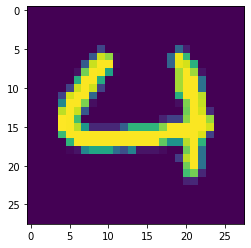

In [11]:
digit = train_images[60]
print(train_labels[60])
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show()

Manipulating tensor in **Numpy**

In [12]:
my_slice = train_images[10:100] 
print(my_slice.shape)

(90, 28, 28)


In [13]:
slice = train_images[100:5000,0:28,0:28]
print(slice.shape)

(4900, 28, 28)


In [14]:
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [15]:
my_slice = train_images[:,14:,14:]   # Bottom right of all the images
my_slice.shape

(60000, 14, 14)

In [16]:
my_slice = train_images[:,7:-7,7:-7]   # 14*14 pixel centeres in the middle
my_slice.shape

(60000, 14, 14)

**The notion of data batches**

Deep learning models do not process an entire dataset at once. They break the data into batches.



In [17]:
batch = train_images[:128] # One batch of our MNIST dataset
batch.shape

(128, 28, 28)

In [ ]:
batch = train_images[128:256] # The next batch
batch.shape

(128, 28, 28)

And the nth batch :
batch= train_images[128*n: (n+1)]

In [ ]:
n=50
batch= train_images[128*n: 128*(n+1)]
batch.shape


(128, 28, 28)

The first axes (axis 0) is called batch size.

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Tensors operations**

Element-wise operations

In [ ]:
import numpy as np
#x = np.random.random(10)
x = np.array([-5,1,-2,0,5])
print('x=',x)
#y= np.random.random(10)
y = np.array([+2,-2,3,-5,-2])
print('y=',y)
z=x+y                         # Element Wise operation (addition)
print('z=',z)
z = np.maximum(z,0)           # Element-wise relu
print('relu of z=',z)

x= [-5  1 -2  0  5]
y= [ 2 -2  3 -5 -2]
z= [-3 -1  1 -5  3]
relu of z= [0 0 1 0 3]


**Broadcasting** (Smaller tensor will be broadcasted to match the shape of larger tensor):
1. Axes are added to smaller tensor.
2. The smaller tensor is repeated alongside these new axes to match the shape of the larger tensor.


In [ ]:
import numpy as np
x= np.random.random((32,1,7,5))  #4D tensor
y= np.random.random((7,5))       #2D tensor
z= np.maximum(x,y)
print(z.shape)
print(z)

(32, 1, 7, 5)
[[[[0.60973613 0.45346629 0.98625937 0.69114916 0.32699307]
   [0.92627755 0.57338805 0.68965019 0.927754   0.99775003]
   [0.87808027 0.82267743 0.77158879 0.85254512 0.84097119]
   ...
   [0.94998773 0.80465429 0.4697345  0.43288558 0.79863928]
   [0.60122328 0.93003482 0.71487131 0.90901731 0.48329237]
   [0.80757651 0.90685878 0.9075534  0.98782749 0.95808555]]]


 [[[0.81708137 0.20025638 0.98625937 0.57102621 0.2908543 ]
   [0.92627755 0.93564157 0.49415558 0.95121105 0.73569646]
   [0.78481277 0.82267743 0.77158879 0.42978488 0.39602846]
   ...
   [0.94998773 0.80465429 0.92540524 0.77886618 0.69779871]
   [0.60122328 0.77585794 0.71487131 0.90901731 0.7651617 ]
   [0.52274497 0.69480653 0.9075534  0.33997933 0.95808555]]]


 [[[0.43419916 0.20025638 0.98625937 0.60044152 0.5328318 ]
   [0.92627755 0.19583473 0.49953694 0.66276272 0.62034885]
   [0.78481277 0.82267743 0.77158879 0.93487555 0.42155619]
   ...
   [0.94998773 0.98844006 0.4697345  0.88991071 0.5852961

In [ ]:
import numpy as np
x= np.random.random((32,1,8,5))
y= np.random.random((8,5))
z= x+y                                # automatic broadcasting
print(z.shape)

(32, 1, 8, 5)


In [ ]:
import numpy as np
x= np.random.random((32,1,8,5))
y= np.random.random((1,8,5))
z= x*y                                # automatic broadcasting
print(z.shape)

(32, 1, 8, 5)


**Tensor dot**

In [ ]:
import numpy as np
x= np.random.random((32,5,8))
y= np.random.random((8,8,7))
z= np.dot(x,y)                                
print(z.shape)

(32, 5, 8, 7)


**Tensor reshaping**

In [ ]:
x= np.array([[1,2,3,4],[5,6,7,8]])
x
x.shape


(2, 4)

In [ ]:
y= x.reshape((1,8))
y


array([[1, 2, 3, 4, 5, 6, 7, 8]])

In [ ]:
a= np.array([1,2,3])
b= np.array([4,5,6])
c= np.dot(a,b)

print(a.shape)
print(b.shape)
print(c.shape)
print(c)


(3,)
(3,)
()
32


**Network Architecture**

In [18]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,))) # output = relu(dot(w,input)+b)

network.add(layers.Dense(256,activation = 'relu'))


network.add(layers.Dense(10,activation='softmax'))

In [20]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')

**Preparing the image data**

In [21]:
print(train_images.shape)
train_images=train_images.reshape((60000,28*28))
print(train_images.shape)
train_images= train_images.astype('float')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255 

(60000, 28, 28)
(60000, 784)


**Preparing the labels**

In [22]:
from tensorflow.keras.utils import to_categorical
print(train_labels.shape)
train_labels = to_categorical(train_labels)
print(train_labels.shape)
test_labels = to_categorical(test_labels)

(60000,)
(60000, 10)


In [23]:
network.fit(train_images, train_labels, epochs=8, batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 19s 9ms/step - loss: 0.1899 - accuracy: 0.9429
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0923 - accuracy: 0.9754
Epoch 3/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0744 - accuracy: 0.9815
Epoch 4/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0640 - accuracy: 0.9844
Epoch 5/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0564 - accuracy: 0.9873
Epoch 6/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0493 - accuracy: 0.9888
Epoch 7/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0448 - accuracy: 0.9902
Epoch 8/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0389 - accuracy: 0.9918


**Calculating the performance of algorithm.**

In [24]:
test_loss,test_acc = network.evaluate(test_images,test_labels) 

313/313 [==============================] - 1s 4ms/step - loss: 0.2027 - accuracy: 0.9766


In [25]:
print('test_acc:',test_acc)
print('test_loss:',test_loss)

test_acc: 0.9765999913215637
test_loss: 0.20271365344524384
